## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
"https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue"

'https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue'

In [1]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.8
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 116s 2s/step - loss: 1.2196 - accuracy: 0.8319 - val_loss: 1.9621 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 110s 2s/step - loss: 0.5250 - accuracy: 0.9226 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 101s 2s/step - loss: 0.4484 - accuracy: 0.9436 - val_loss: 2.9561e-04 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 116s 2s/step - loss: 0.4043 - accuracy: 0.9421 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 119s 2s/step - loss: 0.3947 - accuracy: 0.9513 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 120s 2s/step - loss: 0.2377 - accuracy: 0.9718 - val_loss: 0.1971 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 121s 2s/step - loss: 0

In [17]:
import matplotlib.pyplot as plt

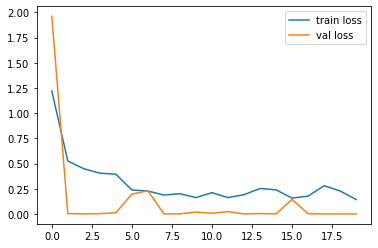

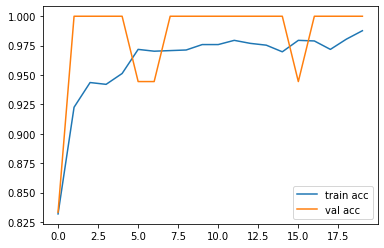

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [20]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[5.3846088e-29, 2.2531559e-23, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.1657728e-08, 1.2172376e-20, 1.0000000e+00, 1.5230057e-28],
       [4.8872598e-30, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3303991e-33, 0.0000000e+00],
       [4.5714924e-16, 8.6781859e-11, 1.3235285e-09, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.4839473e-28, 1.0000000e+00, 3.3122518e-22, 6.6293510e-21],
       [1.0000000e+00, 5.0101860e-30, 0.0000000e+00, 0.0000000e+00],
       [7.8975147e-36, 2.7945514e-23, 1.0478895e-18, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.2099686e-36],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [5.2780553e-25, 1.6846226e-15, 1.0000000e+00, 1.5684442e-16],
       [0.0000000e+00, 3.1915728e-

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([3, 1, 2, 3, 1, 2, 3, 1, 1, 2, 2, 0, 0, 3, 3, 2, 0, 1])

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_resnet152V2.h5')

In [29]:
img=image.load_img('/home/abilash/Downloads/Cotton Disese Prediction/val/diseased cotton leaf/dis_leaf (85)_iaip.jpg',target_size=(224,224))



In [30]:
x=image.img_to_array(img)
x

array([[[118., 108.,  96.],
        [141., 131., 119.],
        [133., 123., 111.],
        ...,
        [161., 195., 145.],
        [159., 193., 143.],
        [153., 191., 140.]],

       [[ 92.,  82.,  70.],
        [110., 100.,  88.],
        [132., 122., 110.],
        ...,
        [163., 197., 147.],
        [161., 195., 145.],
        [153., 191., 140.]],

       [[100.,  90.,  78.],
        [151., 141., 129.],
        [195., 185., 173.],
        ...,
        [164., 198., 148.],
        [162., 196., 146.],
        [153., 191., 140.]],

       ...,

       [[126., 111.,  90.],
        [161., 146., 125.],
        [159., 144., 123.],
        ...,
        [150., 133., 123.],
        [198., 181., 171.],
        [209., 190., 175.]],

       [[142., 127., 106.],
        [164., 149., 128.],
        [163., 148., 127.],
        ...,
        [140., 123., 113.],
        [168., 151., 141.],
        [180., 158., 144.]],

       [[142., 126., 111.],
        [177., 161., 145.],
        [166., 1

In [13]:
x.shape

(224, 224, 3)

In [14]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'